In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv

### Data preparation

In [2]:
df = pd.read_csv('course_lead_scoring.csv')

In [3]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,1452,1453,1454,1455,1456,1457,1458,1459,1460,1461
lead_source,paid_ads,social_media,events,paid_ads,referral,events,social_media,social_media,referral,paid_ads,...,organic_search,paid_ads,referral,referral,social_media,referral,referral,paid_ads,referral,organic_search
industry,NaN,retail,healthcare,retail,education,manufacturing,technology,NaN,healthcare,other,...,retail,education,finance,finance,healthcare,manufacturing,technology,technology,NaN,finance
number_of_courses_viewed,1,1,5,2,3,1,0,5,4,3,...,1,2,0,2,1,1,3,1,5,3
annual_income,79450.0,46992.0,78796.0,83843.0,85012.0,59904.0,51283.0,62975.0,38648.0,59866.0,...,49154.0,65742.0,75546.0,NaN,45253.0,NaN,65259.0,45688.0,71016.0,92855.0
employment_status,unemployed,employed,unemployed,NaN,self_employed,NaN,NaN,student,unemployed,student,...,student,employed,NaN,NaN,NaN,self_employed,student,student,self_employed,student
location,south_america,south_america,australia,australia,europe,africa,middle_east,europe,south_america,australia,...,africa,australia,asia,south_america,australia,north_america,europe,north_america,north_america,north_america
interaction_count,4,1,3,1,3,6,2,4,2,3,...,4,0,0,3,6,4,2,3,0,3
lead_score,0.94,0.8,0.69,0.87,0.62,0.83,0.57,0.62,0.86,0.43,...,0.37,0.57,0.1,0.47,0.24,0.53,0.24,0.02,0.25,0.41
converted,1,0,1,0,1,1,0,1,1,1,...,1,0,0,1,1,1,1,1,1,1


In [4]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [5]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [6]:
df.lead_source = df.lead_source.fillna('NA')
df.industry = df.industry.fillna('NA')
df.employment_status = df.employment_status.fillna('NA')
df.location = df.location.fillna('NA')
df.annual_income = df.annual_income.fillna(0.0)

In [7]:
numerical = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']

In [8]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)

In [9]:
numerical+categorical

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score',
 'lead_source',
 'industry',
 'employment_status',
 'location']

In [10]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

del df_train['converted']
del df_val['converted']
del df_test['converted']

In [11]:
len(df_train), len(df_val), len(df_test)

(876, 293, 293)

0.7635680590007088

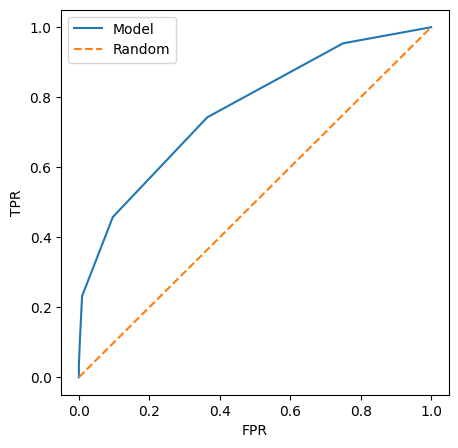

In [12]:
fpr, tpr, thresholds = roc_curve(y_train, df_train.number_of_courses_viewed)
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()
auc(fpr, tpr)

0.5519578313253012

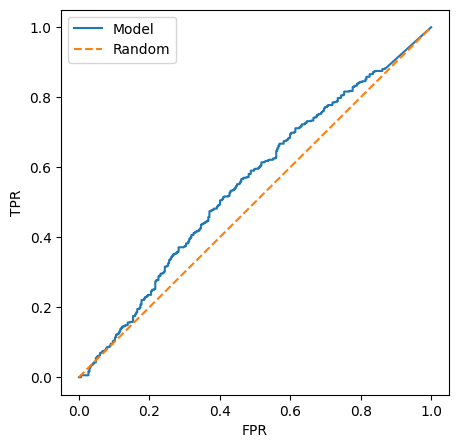

In [13]:
fpr, tpr, thresholds = roc_curve(y_train, df_train.annual_income)
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()
auc(fpr, tpr)

0.738270176293409

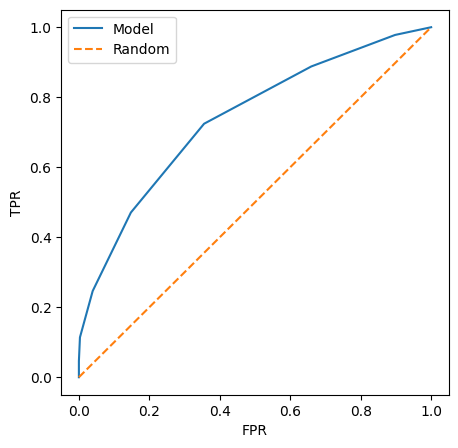

In [14]:
fpr, tpr, thresholds = roc_curve(y_train, df_train.interaction_count)
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()
auc(fpr, tpr)

0.6144993577250176

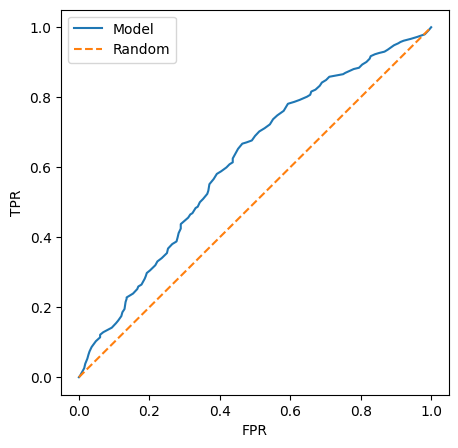

In [15]:
fpr, tpr, thresholds = roc_curve(y_train, df_train.lead_score)
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()
auc(fpr, tpr)

In [16]:
# roc_auc_score(y_train, df_train.lead_score)

### Train model and AUC

In [17]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='lbfgs', C=1.0, max_iter=10000)
model.fit(X_train, y_train)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

np.float64(0.8532423208191127)

In [18]:
roc_auc_score(y_val, y_pred)

0.9202856868948326

### Precision and recall

In [19]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [20]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)

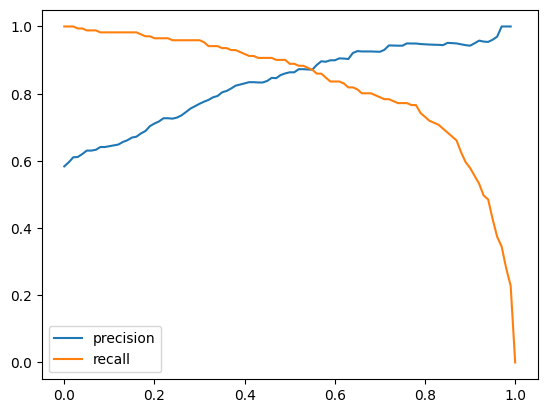

In [21]:
plt.plot(df_scores.threshold, df_scores['p'], label='precision')
plt.plot(df_scores.threshold, df_scores['r'], label='recall')
plt.legend()

In [22]:
df_scores[(abs(df_scores.p-df_scores.r)<0.009)]

,threshold,tp,fp,fn,tn,p,r
54,0.54,150,22,21,100,0.872093,0.877193
55,0.55,149,22,22,100,0.871345,0.871345


In [23]:
df_scores['f1'] = 2 * df_scores.p * df_scores.r / (df_scores.p + df_scores.r)

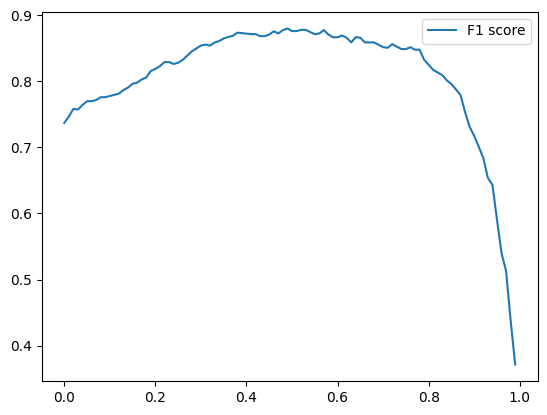

In [24]:
plt.plot(df_scores.threshold, df_scores['f1'], label='F1 score')
plt.legend()

In [25]:
df_scores[df_scores.f1==df_scores.f1.max()]

,threshold,tp,fp,fn,tn,p,r,f1
49,0.49,154,25,17,97,0.860335,0.900585,0.88


In [26]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [27]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

scores = []
for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.converted.values
    y_val = df_val.converted.values

    del df_train['converted']
    del df_val['converted']

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print(scores)
print('C=%s %.3f +- %.3f' % (1, np.mean(scores), np.std(scores)))

[0.8060745924216483, 0.8713738368910783, 0.7754320118852139, 0.8018368617683685, 0.8558272713202291]
C=1 0.822 +- 0.036


In [ ]:
n_splits = 5

for C in [0.000001, 0.001, 1]:
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.converted.values
        y_val = df_val.converted.values

        del df_train['converted']
        del df_val['converted']

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
    print(scores)
    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

In [ ]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

X_val_num = df_val[numerical].values
X_val_num = scaler.transform(X_val_num)

X_val_cat = ohe.transform(df_val[categorical].values)

X_val = np.column_stack([X_val_num, X_val_cat])

In [ ]:
y_pred = model.predict_proba(X_val)[:, 1]
#churn_decision = (y_pred >= 0.5)
#(y_val == churn_decision).mean()

accuracy_score(y_val, y_pred >= 0.5)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()
auc(fpr, tpr)

In [ ]:
y_pred = model.predict_proba(X_train)[:, 1]
roc_auc_score(y_val, y_pred)

### Question 4

In [ ]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

In [ ]:
# to match HW values the accuracy has to be obtained on train data
y_pred = model.predict_proba(X_val)[:, 1]
converted_decision = (y_pred >= 0.5)
acc_full = (y_val == converted_decision).mean()
acc_full

In [ ]:
feats = categorical + numerical
for f in feats:
    feat_list = [x for x in feats if x != f]
    train_dict = df_train[feat_list].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    val_dict = df_val[feat_list].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    converted_decision = (y_pred >= 0.5)
    acc = (y_val == converted_decision).mean()
    print(f'Without {f} - the diff is {round(acc_full-acc,6)}')

### Question 6

In [ ]:
C_values = [0.01, 0.1, 1, 10, 100]

for c_val in C_values:
    train_dict = df_train[categorical + numerical].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    
    val_dict = df_val[categorical + numerical].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    model = LogisticRegression(solver='liblinear', C=c_val, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict_proba(X_val)[:, 1]
    converted_decision = (y_pred >= 0.5)
    acc = (y_val == converted_decision).mean()
    print(f'{c_val} - {round(acc,9)}')